In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import image as mpimg
from tensorflow.keras.utils import plot_model
print(os.listdir("../input"))

Using TensorFlow backend.


['asl-alphabets-and-digits']


In [2]:
train_dir = '../input/asl-alphabets-and-digits/ASl_alphabets/asl_alphabet_train/asl_alphabet_train'
test_dir = '../input/asl-alphabets-and-digits/ASl_alphabets//asl_alphabet_test/asl_alphabet_test'

In [3]:
from PIL import Image
import os

# specify the path of the image
image_path = "../input/asl-alphabets-and-digits/ASl_alphabets/asl_alphabet_train/asl_alphabet_train/0/IMG_1118.JPG"

# open the image using PIL
with Image.open(image_path) as img:

    # get the dimensions of the image
    width, height = img.size

    # print the dimensions of the image
    print(f"The dimensions of the image are {width}x{height} pixels.")

The dimensions of the image are 100x100 pixels.


In [4]:
input_dir = '../input/asl-alphabets-and-digits/ASl_alphabets/asl_alphabet_train/asl_alphabet_train/'

class_names = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M',
                   'N','O','P','Q','R','S','T','U','V','W','X','Y',
                   'Z','space','del','nothing']
directories = {}

for class_name in class_names:
    dir_path = os.path.join(input_dir, class_name + '/')
    directories[class_name] = dir_path

number_classes = {}

for class_name, directory in directories.items():
    number_classes[class_name] = len(os.listdir(directory))

print(number_classes)

{'0': 205, '1': 206, '2': 206, '3': 206, '4': 207, '5': 207, '6': 207, '7': 206, '8': 208, '9': 204, 'A': 3000, 'B': 3000, 'C': 3000, 'D': 3000, 'E': 3000, 'F': 3000, 'G': 3000, 'H': 3000, 'I': 3000, 'J': 3000, 'K': 3000, 'L': 3000, 'M': 3000, 'N': 3000, 'O': 3000, 'P': 3000, 'Q': 3000, 'R': 3000, 'S': 3000, 'T': 3000, 'U': 3000, 'V': 3000, 'W': 3000, 'X': 3000, 'Y': 3000, 'Z': 3000, 'space': 3000, 'del': 3000, 'nothing': 3000}


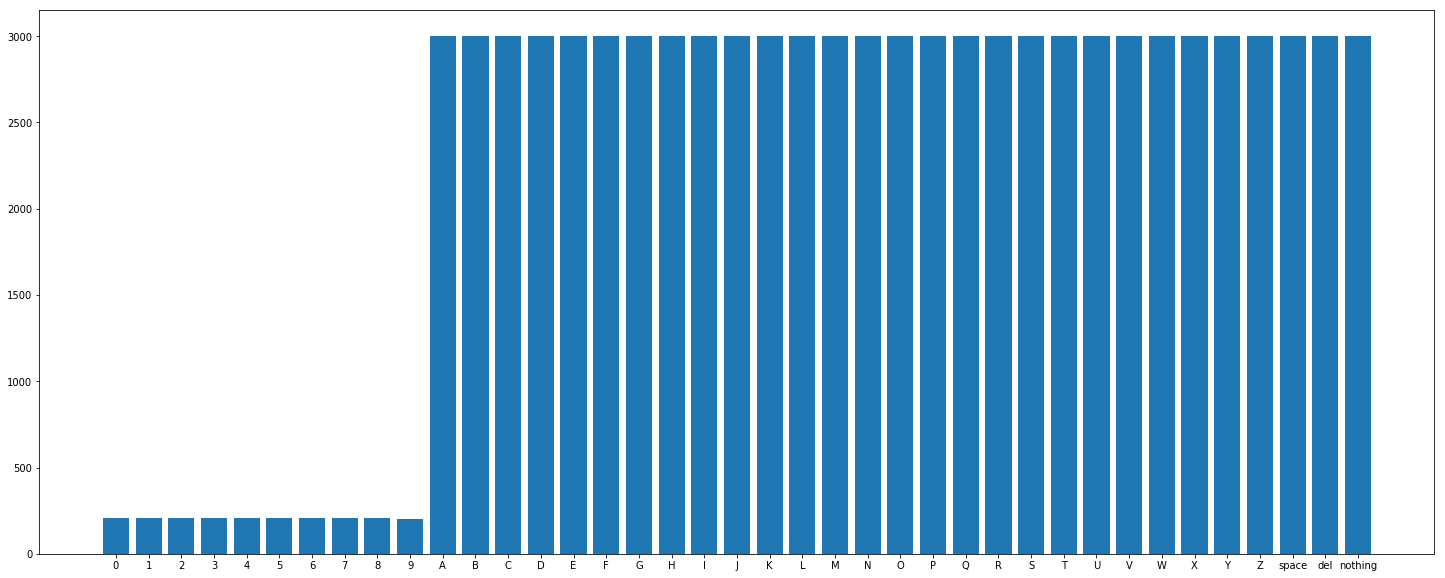

In [5]:
import matplotlib.pyplot as plt

data = number_classes
names = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize =(25, 10))

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

**Plotting one image from each class :**

unique_labels =  ['N', '7', 'R', 'space', '2', 'B', 'I', 'del', 'F', 'H', '5', 'E', 'U', 'M', '8', 'X', '0', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', '3', '1', 'C', '4', 'P', '9', 'L', '6', 'W', 'D', 'nothing', 'J']


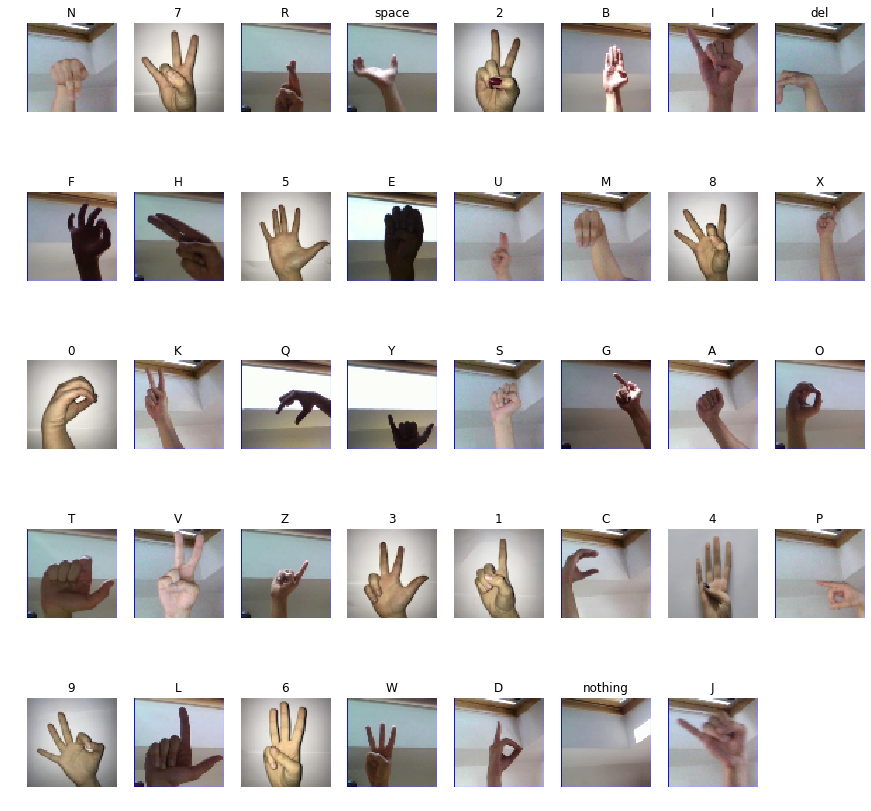

In [6]:
def load_unique():
    size_img = 64,64 
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)

fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 5
col = 8
for i in range(1,(row*col)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

**LOADING DATA**
1. Defining a dictionary which contains labels and its mapping to a number which acts as class label.
2. loading image data and labels and then mapping those labels to the dictionary defined before.
3. Normalizing image data.
4. converting labels to one hot format.
5. creating training and test data by splitting original data into 95% of training data and 5% testing data.

In [7]:
labels_dict = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'A':10,'B':11,'C':12,'D':13,'E':14,'F':15,'G':16,'H':17,'I':18,'J':19,'K':20,'L':21,'M':22,
                   'N':23,'O':24,'P':25,'Q':26,'R':27,'S':28,'T':29,'U':30,'V':31,'W':32,'X':33,'Y':34,
                   'Z':35,'space':36,'del':37,'nothing':38}

def load_data():
    """
    Loads data and preprocess. Returns train and test data along with labels.
    """
    images = []
    labels = []
    size = 64,64
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir):
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(labels_dict[folder])
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    labels = keras.utils.to_categorical(labels)
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.2)
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [8]:
X_train, X_test, Y_train, Y_test = load_data()

LOADING DATA FROM : N | 7 | R | space | 2 | B | I | del | F | H | 5 | E | U | M | 8 | X | 0 | K | Q | Y | S | G | A | O | T | V | Z | 3 | 1 | C | 4 | P | 9 | L | 6 | W | D | nothing | J | 
Loaded 71249 images for training, Train data shape = (71249, 64, 64, 3)
Loaded 17813 images for testing Test data shape = (17813, 64, 64, 3)


In [9]:
X_train.shape

(71249, 64, 64, 3)

In [10]:
Y_train.shape

(71249, 39)

**DEFINING MODEL**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout, Dense
from tensorflow.keras import regularizers

def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(16, kernel_size=[2, 2], activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=[2, 2]))
    
    model.add(Conv2D(32, kernel_size=[2, 2], activation='relu'))
    model.add(MaxPooling2D(pool_size=[2, 2]))
    
    model.add(Conv2D(64, kernel_size=[2, 2], activation='relu'))
    model.add(MaxPooling2D(pool_size=[2, 2]))
    
    #model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
    model.add(Dense(39, activation='softmax'))
    
    model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

def fit_model():
    model_hist = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.2)
    return model_hist


**COMPILING THE MODEL AND FITTING THE TRAINING DATA**

In [12]:
model = create_model()
curr_model_hist = fit_model()

MODEL CREATED
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 63, 63, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0      

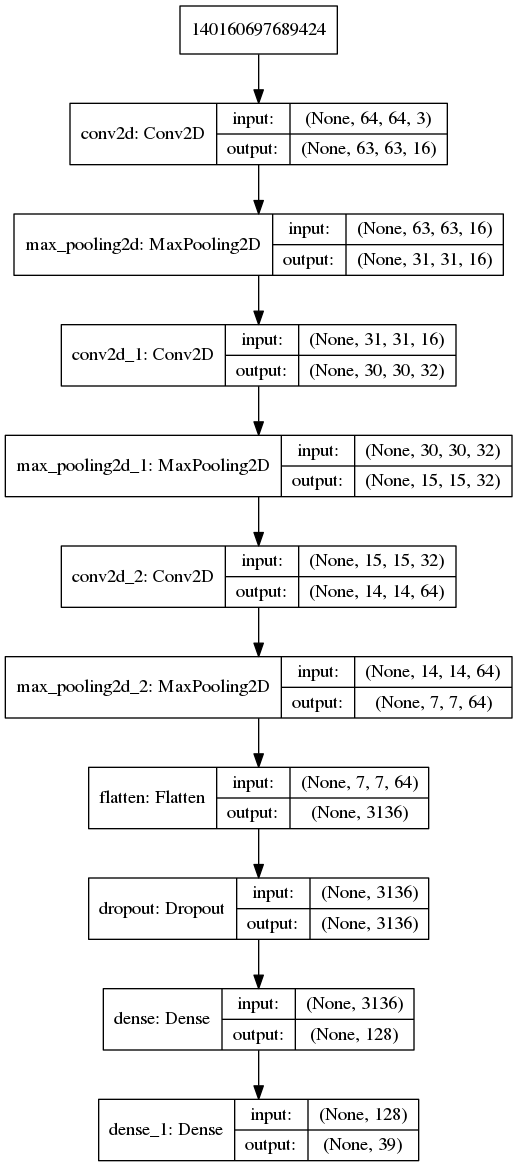

In [13]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model1.png', show_shapes=True)
Image('model1.png')

**Plotting the model performance metrics to check model performance.**

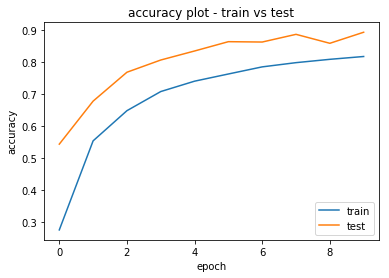

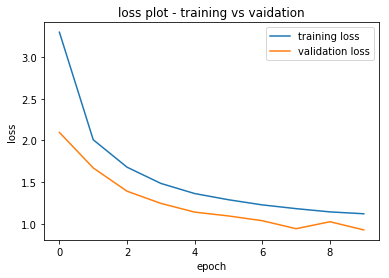

In [14]:
plt.plot(curr_model_hist.history['acc'])
plt.plot(curr_model_hist.history['val_acc'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(curr_model_hist.history['loss'])
plt.plot(curr_model_hist.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**EVALUATING THE TRAINED MODEL ON THE TEST DATA SPLIT **

In [15]:
evaluate_metrics = model.evaluate(X_test, Y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

17813/17813 [==============================] - 1s 74us/sample - loss: 0.9269 - acc: 0.8932

Evaluation Accuracy =  89.32% 
Evaluation loss =  0.926895


Loading the test data Provided. 
* The test data contains images with the image name as the class, to which the image belongs to.
* we will load the data and check if the predition is correct for the image.

In [16]:
def load_test_data():
    images = []
    names = []
    size = 64,64
    for image in os.listdir(test_dir):
        temp = cv2.imread(test_dir + '/' + image)
        temp = cv2.resize(temp, size)
        images.append(temp)
        names.append(image)
    images = np.array(images)
    images = images.astype('float32')/255.0
    return images, names

test_images, test_img_names = load_test_data()

In [17]:
# make predictions on an image and append it to the list (predictions).
#predictions = [model.predict_classes(image.reshape(1,64,64,3))[0] for image in test_images]
predictions = [np.argmax(model.predict(image.reshape(1,64,64,3))) for image in test_images]


In [18]:
def get_labels_for_plot(predictions):
    predictions_labels = []
    for i in range(len(predictions)):
        for ins in labels_dict:
            if predictions[i] == labels_dict[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels

predictions_labels_plot = get_labels_for_plot(predictions)

PLOTTING THE TEST DATA ALONG WITH THE PREDICTION MADE BY THE MODEL

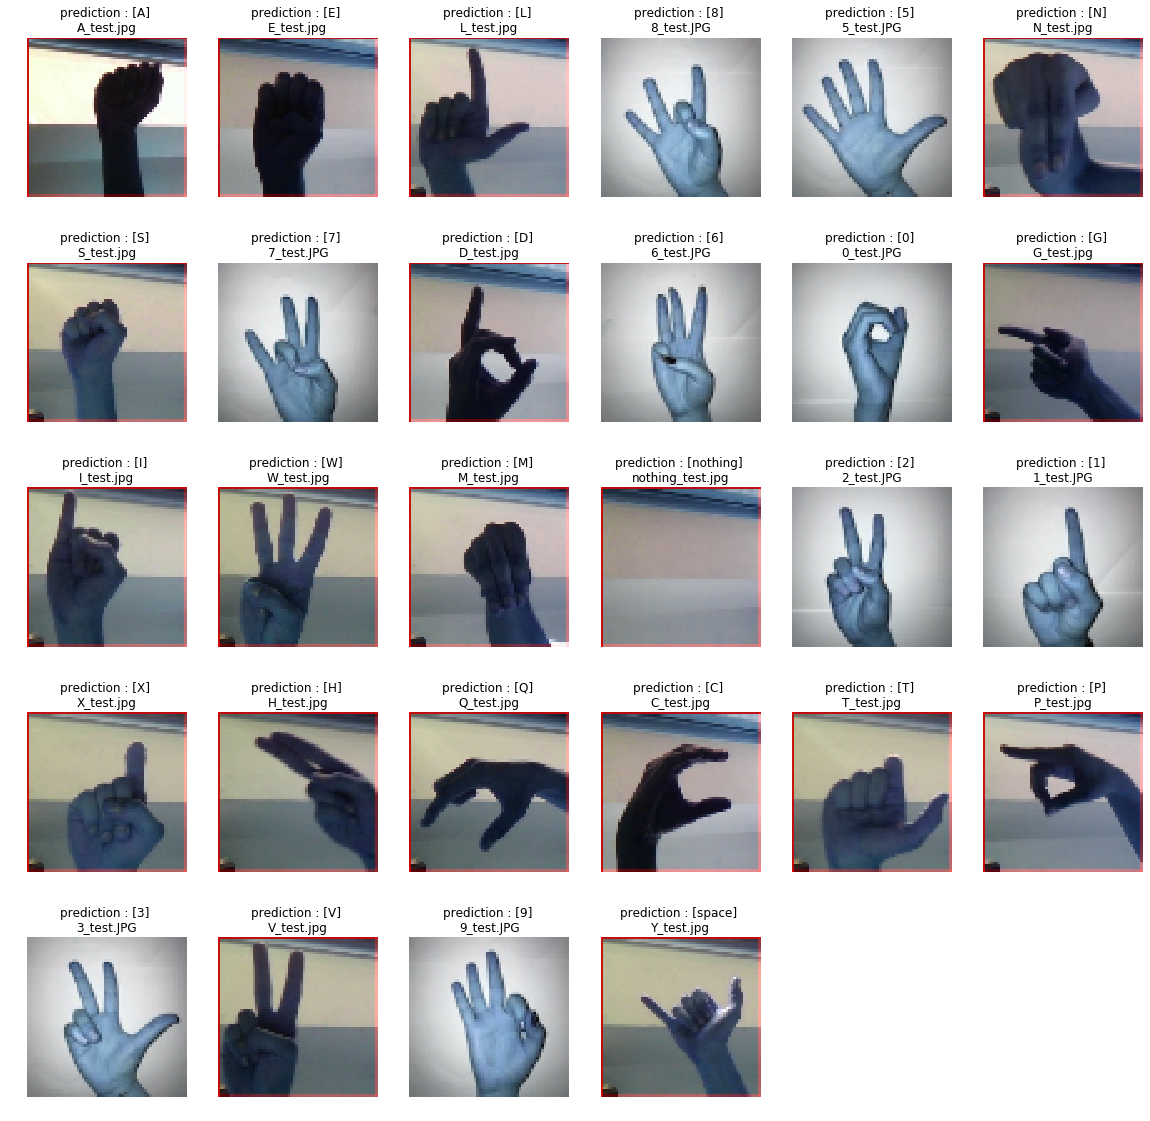

In [19]:
predfigure = plt.figure(figsize = (20,20))
def plot_image_1(fig, image, label, prediction, predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    title = "prediction : [" + str(predictions_label) + "] "+ "\n" + label
    plt.title(title)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col-1)):
    plot_image_1(predfigure, test_images[image_index], test_img_names[image_index], predictions[image_index], predictions_labels_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

As we can see the predictions are correct for almost all the images. Thus the model performs well on the test set.

In [20]:
model.save('CNN_1.h5')


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Get the predicted probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred_classes)
print('Confusion Matrix:\n', cm)

# Generate the classification report
report = classification_report(Y_test.argmax(axis=1), y_pred_classes)
print('Classification Report:\n', report)

Confusion Matrix:
 [[ 40   0   0 ...   0   0   0]
 [  0  17   5 ...   0   0   0]
 [  0   1  23 ...   0   0   0]
 ...
 [  0   0   0 ... 603   0   0]
 [  0   0   0 ...  10 573   0]
 [  0   0   0 ...   1   0 588]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.89      0.65      0.76        26
           2       0.77      0.66      0.71        35
           3       0.86      0.86      0.86        37
           4       0.64      0.76      0.69        37
           5       0.94      0.91      0.93        55
           6       0.79      0.41      0.54        37
           7       0.59      1.00      0.75        41
           8       0.58      0.78      0.67        36
           9       0.86      0.69      0.77        36
          10       0.91      0.94      0.92       616
          11       0.99      0.85      0.91       607
          12       0.99      0.94      0.97       600
        

In [22]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate model 1
y_pred1 = model.predict(X_test)
accuracy1 = accuracy_score(Y_test.argmax(axis=1), y_pred1.argmax(axis=1))
precision1 = precision_score(Y_test.argmax(axis=1), y_pred1.argmax(axis=1), average='weighted')
recall1 = recall_score(Y_test.argmax(axis=1), y_pred1.argmax(axis=1), average='weighted')
f1_score1 = f1_score(Y_test.argmax(axis=1), y_pred1.argmax(axis=1), average='weighted')

In [23]:
def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(16, kernel_size = [2,2], activation = 'relu', input_shape = (64,64,3)))
    model.add(MaxPool2D(pool_size = [2,2]))
    
    model.add(Conv2D(32, kernel_size = [2,2], activation = 'relu'))
    model.add(MaxPool2D(pool_size = [2,2]))
    
    model.add(Conv2D(64, kernel_size = [2,2], activation = 'relu'))
    model.add(MaxPool2D(pool_size = [2,2]))
    
    #model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.05)))
    model.add(Dense(39, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

def fit_model():
    model_hist = model.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split = 0.2)
    return model_hist 

In [24]:
def create_model():
    
    model2 = Sequential()
    
    model2.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (72,72,3)))
   #model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model2.add(MaxPool2D(pool_size = [2,2]))
    
    model2.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
   # model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model2.add(MaxPool2D(pool_size = [2,2]))
    
    model2.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
   # model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model2.add(MaxPool2D(pool_size = [2,2]))
    
    model.add(BatchNormalization())
    
    model2.add(Flatten())
    model2.add(Dropout(0.5))
    model2.add(Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.05)))
    model2.add(Dense(39, activation = 'softmax'))
    
    model2.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    model2.summary()
    
    return model

def fit_model():
    model_hist = model2.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split = 0.2)
    return model_hist 

In [25]:
def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(16, kernel_size=[3, 3], activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=[3, 3]))
    
    model.add(Conv2D(32, kernel_size=[3, 3], activation='relu'))
    model.add(MaxPooling2D(pool_size=[3, 3]))
    
    model.add(Conv2D(64, kernel_size=[3, 3], activation='relu'))
    model.add(MaxPooling2D(pool_size=[3, 3]))
    
    #model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
    model.add(Dense(39, activation='softmax'))
    
    model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

def fit_model():
    model_hist = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.2)
    return model_hist

In [26]:
model = create_model()
curr_model_hist = fit_model()

MODEL CREATED
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0      

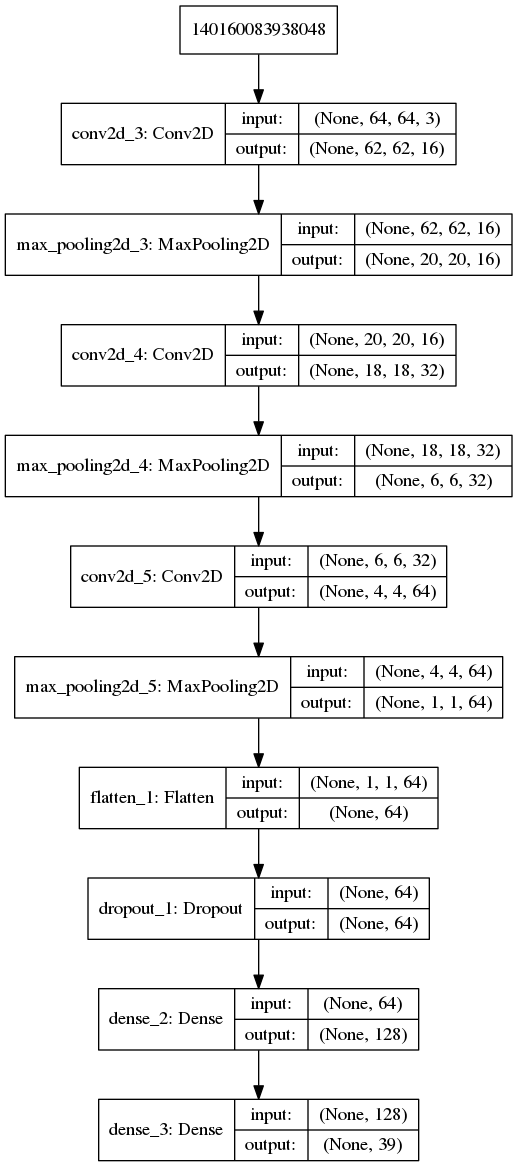

In [27]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model2.png', show_shapes=True)
Image('model2.png')

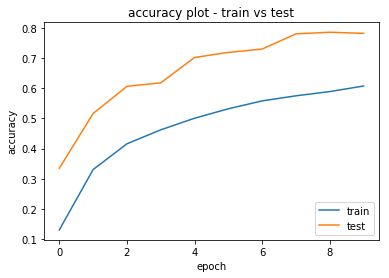

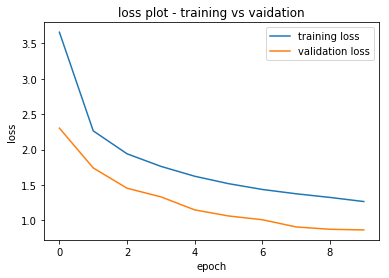

In [28]:
plt.plot(curr_model_hist.history['acc'])
plt.plot(curr_model_hist.history['val_acc'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(curr_model_hist.history['loss'])
plt.plot(curr_model_hist.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [29]:
evaluate_metrics = model.evaluate(X_test, Y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

17813/17813 [==============================] - 1s 74us/sample - loss: 0.8621 - acc: 0.7805

Evaluation Accuracy =  78.05% 
Evaluation loss =  0.862101


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Get the predicted probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred_classes)
print('Confusion Matrix:\n', cm)

# Generate the classification report
report = classification_report(Y_test.argmax(axis=1), y_pred_classes)
print('Classification Report:\n', report)

Confusion Matrix:
 [[ 37   1   0 ...   0   0   0]
 [  0  23   0 ...   0   0   0]
 [  0   0  31 ...   0   0   0]
 ...
 [  0   0   0 ... 573   0   8]
 [  0   0   0 ...  32 530   3]
 [  0   0   0 ...   1   0 595]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.79      0.88      0.84        26
           2       0.53      0.89      0.66        35
           3       1.00      0.43      0.60        37
           4       0.31      0.73      0.44        37
           5       0.78      0.25      0.38        55
           6       0.34      0.35      0.35        37
           7       1.00      0.02      0.05        41
           8       0.39      0.78      0.52        36
           9       0.40      0.39      0.39        36
          10       0.90      0.68      0.78       616
          11       0.78      0.84      0.81       607
          12       0.98      0.96      0.97       600
        

In [31]:
model.save('CNN_2.h5')

In [32]:
# Evaluate model 2
y_pred2 = model.predict(X_test)
accuracy2 = accuracy_score(Y_test.argmax(axis=1), y_pred2.argmax(axis=1))
precision2 = precision_score(Y_test.argmax(axis=1), y_pred2.argmax(axis=1), average='weighted')
recall2 = recall_score(Y_test.argmax(axis=1), y_pred2.argmax(axis=1), average='weighted')
f1_score2 = f1_score(Y_test.argmax(axis=1), y_pred2.argmax(axis=1), average='weighted')

In [33]:
def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(16, kernel_size=[2, 2], activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=[2, 2]))
    
    model.add(Conv2D(32, kernel_size=[2, 2], activation='relu'))
    model.add(MaxPooling2D(pool_size=[2, 2]))
    
    model.add(Conv2D(64, kernel_size=[2, 2], activation='relu'))
    model.add(MaxPooling2D(pool_size=[2, 2]))
    
    model.add(Conv2D(128, kernel_size=[2, 2], activation='relu'))
    model.add(MaxPooling2D(pool_size=[2, 2]))
    
    #model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
    model.add(Dense(39, activation='softmax'))
    
    model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

def fit_model():
    model_hist = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.2)
    return model_hist

In [34]:
model = create_model()
curr_model_hist = fit_model()

MODEL CREATED
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 63, 63, 16)        208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 128)         32896  

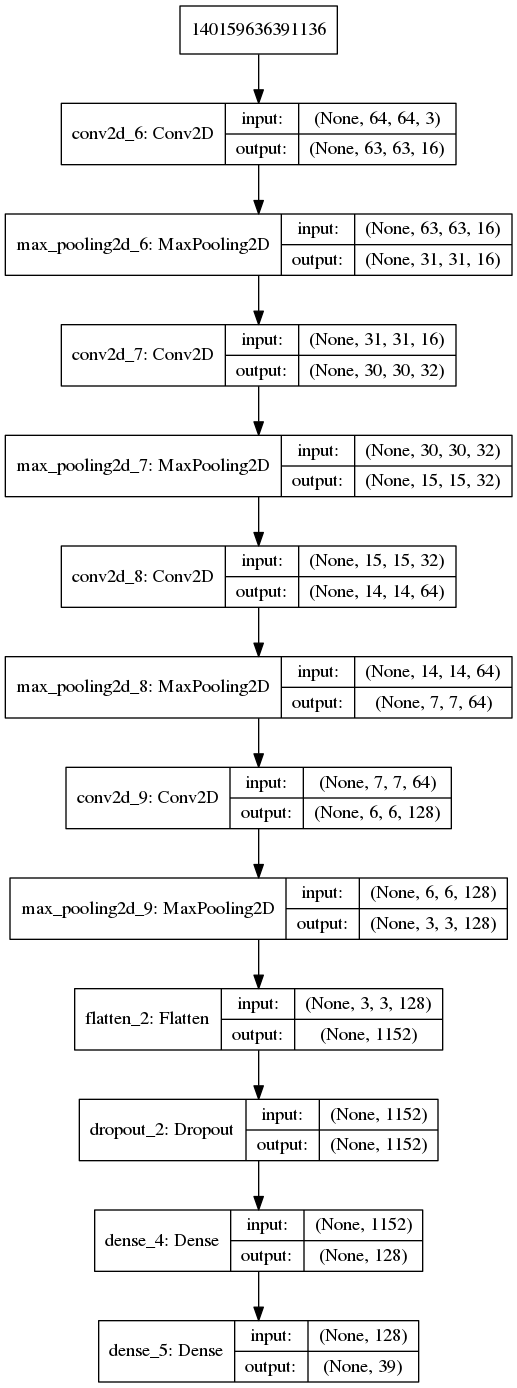

In [35]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model2.png', show_shapes=True)
Image('model2.png')

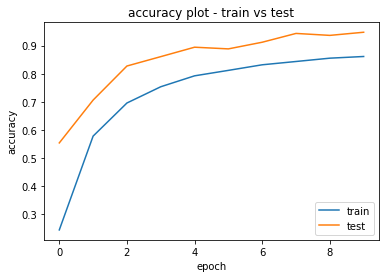

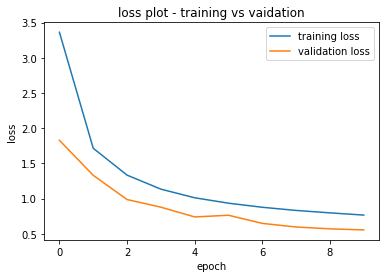

In [36]:
plt.plot(curr_model_hist.history['acc'])
plt.plot(curr_model_hist.history['val_acc'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(curr_model_hist.history['loss'])
plt.plot(curr_model_hist.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

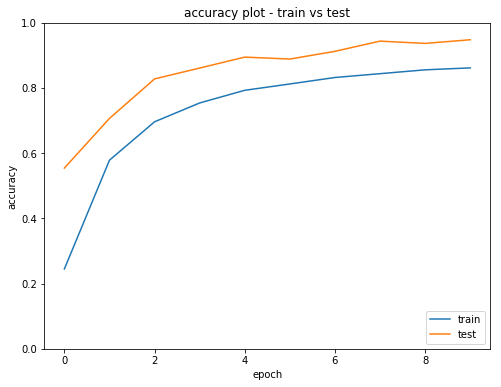

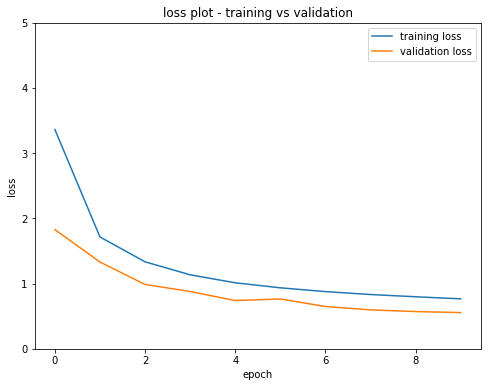

In [37]:
import matplotlib.pyplot as plt

# assume curr_model_hist is a dictionary containing accuracy and loss values
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(curr_model_hist.history['acc'])
ax.plot(curr_model_hist.history['val_acc'])
ax.legend(['train', 'test'], loc='lower right')
ax.set_title('accuracy plot - train vs test')
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.set_ylim([0, 1]) # set the y-axis limits
plt.show()

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(curr_model_hist.history['loss'])
ax.plot(curr_model_hist.history['val_loss'])
ax.legend(['training loss', 'validation loss'], loc = 'upper right')
ax.set_title('loss plot - training vs validation')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_ylim([0, 5]) # set the y-axis limits
plt.show()

In [38]:
evaluate_metrics = model.evaluate(X_test, Y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

17813/17813 [==============================] - 1s 80us/sample - loss: 0.5519 - acc: 0.9468

Evaluation Accuracy =  94.68% 
Evaluation loss =  0.551946


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

# Get the predicted probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred_classes)
print('Confusion Matrix:\n', cm)

# Generate the classification report
report = classification_report(Y_test.argmax(axis=1), y_pred_classes)
print('Classification Report:\n', report)

Confusion Matrix:
 [[ 41   1   0 ...   0   0   0]
 [  1  20   3 ...   0   0   0]
 [  0   0  33 ...   0   0   0]
 ...
 [  0   0   0 ... 599   0   0]
 [  0   0   0 ...   2 588   0]
 [  0   0   0 ...   0   0 596]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.91      0.77      0.83        26
           2       0.70      0.94      0.80        35
           3       0.89      0.92      0.91        37
           4       0.68      0.92      0.78        37
           5       1.00      0.82      0.90        55
           6       0.89      0.65      0.75        37
           7       0.70      0.76      0.73        41
           8       0.81      0.47      0.60        36
           9       0.84      1.00      0.91        36
          10       0.91      0.97      0.94       616
          11       0.94      0.96      0.95       607
          12       1.00      0.97      0.99       600
        

In [40]:
# Evaluate model 3
y_pred3 = model.predict(X_test)
accuracy3 = accuracy_score(Y_test.argmax(axis=1), y_pred3.argmax(axis=1))
precision3 = precision_score(Y_test.argmax(axis=1), y_pred3.argmax(axis=1), average='weighted')
recall3 = recall_score(Y_test.argmax(axis=1), y_pred3.argmax(axis=1), average='weighted')
f1_score3 = f1_score(Y_test.argmax(axis=1), y_pred3.argmax(axis=1), average='weighted')

In [41]:
# Create DataFrame
results = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Accuracy': [accuracy1, accuracy2, accuracy3],
    'Precision': [precision1, precision2, precision3],
    'Recall': [recall1, recall2, recall3],
    'F1-score': [f1_score1, f1_score2, f1_score3]
})

# Display DataFrame
print(results)

     Model  Accuracy  Precision    Recall  F1-score
0  Model 1  0.893224   0.903783  0.893224  0.893296
1  Model 2  0.780497   0.807671  0.780497  0.782899
2  Model 3  0.946780   0.949038  0.946780  0.946610


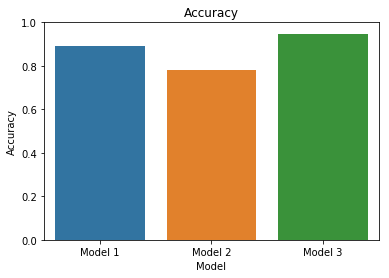

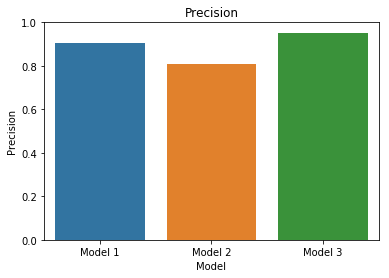

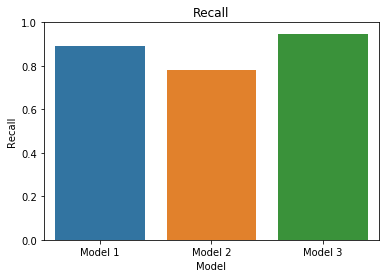

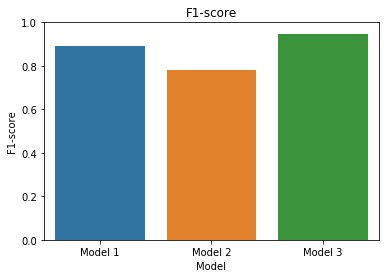

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create bar plot of accuracy scores
sns.barplot(x='Model', y='Accuracy', data=results)
plt.ylim(0, 1)
plt.title('Accuracy')
plt.show()

# Create bar plot of precision scores
sns.barplot(x='Model', y='Precision', data=results)
plt.ylim(0, 1)
plt.title('Precision')
plt.show()

# Create bar plot of recall scores
sns.barplot(x='Model', y='Recall', data=results)
plt.ylim(0, 1)
plt.title('Recall')
plt.show()

# Create bar plot of F1-scores
sns.barplot(x='Model', y='F1-score', data=results)
plt.ylim(0, 1)
plt.title('F1-score')
plt.show()

In [43]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate, LSTM, Reshape
from tensorflow.keras.models import Model

# Define the input shape of the images
input_shape = (64, 64, 3)

# Define the inputs
inputs = Input(shape=input_shape)

# Define the first CNN
conv1 = Conv2D(16, (2, 2), activation='relu', padding='same')(inputs)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv1 = Conv2D(32, (2, 2), activation='relu', padding='same')(pool1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv1 = Conv2D(64, (2, 2), activation='relu', padding='same')(pool1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)
dropout1 = Dropout(0.5)(flat1)
dense1 = Dense(128, activation='relu')(dropout1)


# Define the second CNN

conv2 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
pool2 = MaxPooling2D(pool_size=(3, 3))(conv2)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool2)
pool2 = MaxPooling2D(pool_size=(3, 3))(conv2)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool2)
pool2 = MaxPooling2D(pool_size=(3, 3))(conv2)
flat2 = Flatten()(pool2)
dropout2 = Dropout(0.5)(flat2)
dense2 = Dense(128, activation='relu')(dropout2)

# Define the third CNN

conv3 = Conv2D(16, (2, 2), activation='relu', padding='same')(inputs)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv3 = Conv2D(32, (2, 2), activation='relu', padding='same')(pool3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv3 = Conv2D(64, (2, 2), activation='relu', padding='same')(pool3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv3 = Conv2D(128, (2, 2), activation='relu', padding='same')(pool3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
flat3 = Flatten()(pool3)
dropout3 = Dropout(0.5)(flat3)
dense3 = Dense(128, activation='relu')(dropout3)

# Concatenate the outputs of the three CNNs
merged = concatenate([dense1, dense2, dense3])

# Reshape the output of the concatenation layer to have a timestep dimension
reshaped = Reshape((3, 128))(merged)

# Define the output LSTM
lstm = LSTM(128)(reshaped)

# Define the output layer
outputs = Dense(39, activation='softmax')(lstm)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the data
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=10, batch_size=32)

Train on 56999 samples, validate on 14250 samples
Epoch 1/10
56999/56999 [==============================] - 30s 535us/sample - loss: 1.3103 - acc: 0.5996 - val_loss: 0.2802 - val_acc: 0.9227
Epoch 2/10
56999/56999 [==============================] - 29s 500us/sample - loss: 0.2233 - acc: 0.9304 - val_loss: 0.0904 - val_acc: 0.9750
Epoch 3/10
56999/56999 [==============================] - 29s 505us/sample - loss: 0.1106 - acc: 0.9653 - val_loss: 0.0445 - val_acc: 0.9879
Epoch 4/10
56999/56999 [==============================] - 29s 505us/sample - loss: 0.0748 - acc: 0.9764 - val_loss: 0.0357 - val_acc: 0.9891
Epoch 5/10
56999/56999 [==============================] - 28s 499us/sample - loss: 0.0623 - acc: 0.9798 - val_loss: 0.0292 - val_acc: 0.9909
Epoch 6/10
56999/56999 [==============================] - 29s 506us/sample - loss: 0.0483 - acc: 0.9847 - val_loss: 0.0155 - val_acc: 0.9952
Epoch 7/10
56999/56999 [==============================] - 28s 493us/sample - loss: 0.0464 - acc: 0.9849 

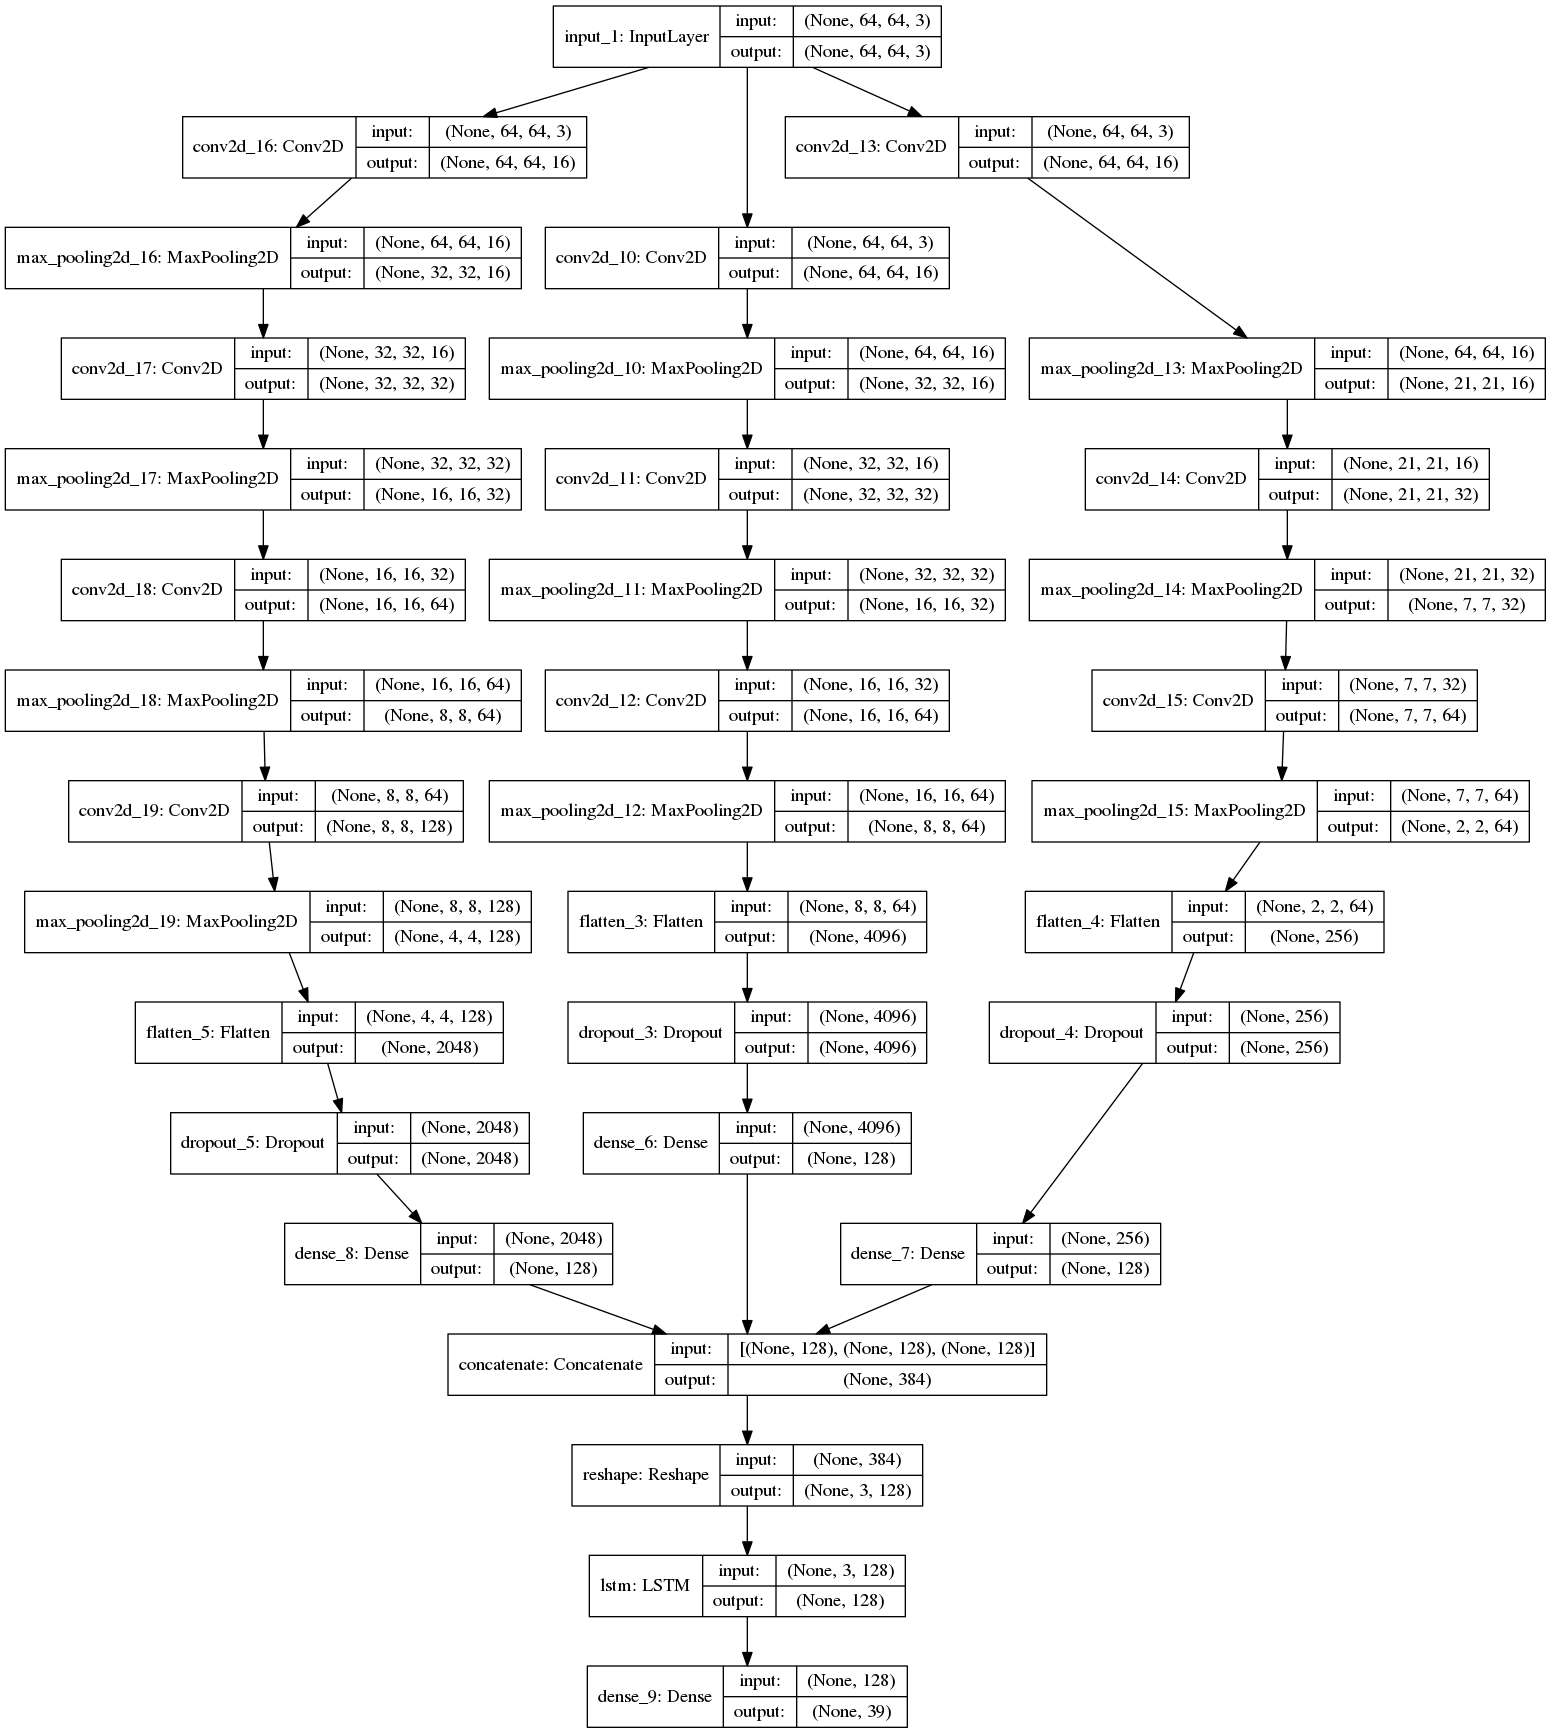

In [44]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model4.png', show_shapes=True)
Image('model4.png')

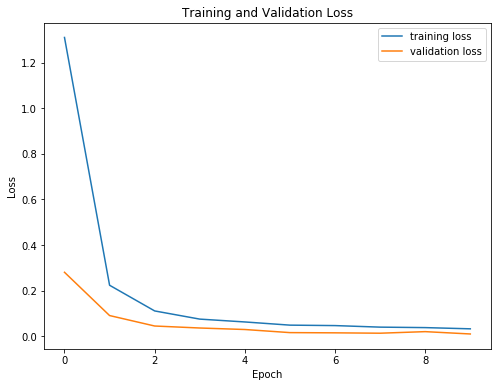

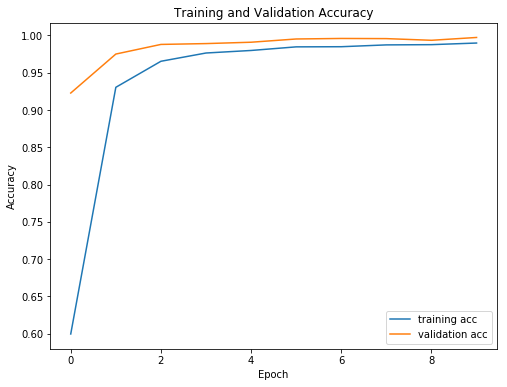

In [45]:
import matplotlib.pyplot as plt

# Train the model and store the history object
#history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=32)
fig, ax = plt.subplots(figsize=(8,6))
# Plot the training and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(history.history['acc'], label='training acc')
plt.plot(history.history['val_acc'], label='validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
# Evaluate the ensemble model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

17813/17813 [==============================] - 3s 170us/sample - loss: 0.0089 - acc: 0.9973
Test loss: 0.008923594861542362
Test accuracy: 0.99730533


In [47]:
from sklearn.metrics import confusion_matrix, classification_report

# Get the predicted probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred_classes)
print('Confusion Matrix:\n', cm)

# Generate the classification report
report = classification_report(Y_test.argmax(axis=1), y_pred_classes)
print('Classification Report:\n', report)

Confusion Matrix:
 [[ 40   1   0 ...   0   0   0]
 [  0  26   0 ...   0   0   0]
 [  0   1  34 ...   0   0   0]
 ...
 [  0   0   0 ... 607   0   0]
 [  0   0   0 ...   0 596   0]
 [  0   0   0 ...   0   0 596]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.93      1.00      0.96        26
           2       1.00      0.97      0.99        35
           3       0.95      0.97      0.96        37
           4       1.00      0.78      0.88        37
           5       1.00      0.96      0.98        55
           6       0.97      0.95      0.96        37
           7       0.82      0.98      0.89        41
           8       0.94      0.94      0.94        36
           9       0.95      1.00      0.97        36
          10       0.99      1.00      1.00       616
          11       1.00      0.99      0.99       607
          12       1.00      1.00      1.00       600
        

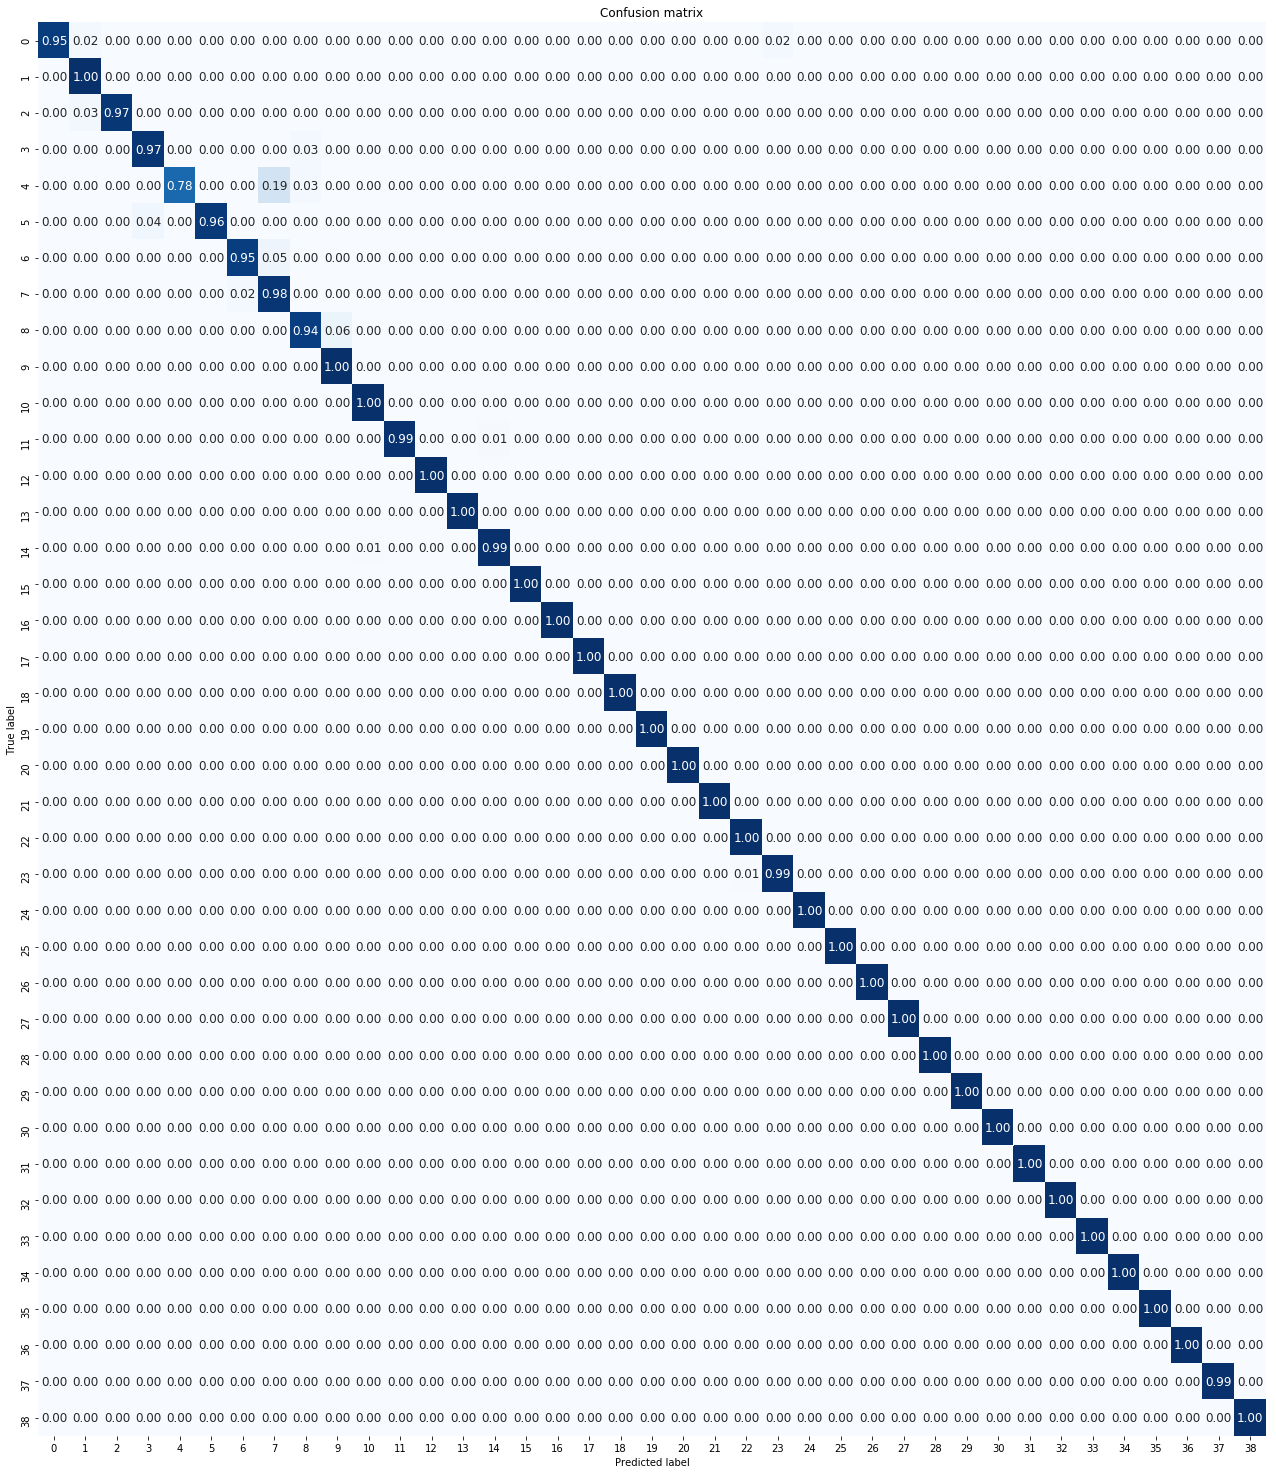

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Evaluate model on test dataset
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_mat = confusion_matrix(Y_test.argmax(axis=1), y_pred)

# Normalize confusion matrix
conf_mat_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(22, 26))
sns.set(font_scale=1)
sns.heatmap(conf_mat_norm, annot=True, fmt='.2f', cmap='Blues', cbar=False, ax=ax)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion matrix')
plt.show()

In [49]:
def load_test_data():
    images = []
    names = []
    size = 64,64
    for image in os.listdir(test_dir):
        temp = cv2.imread(test_dir + '/' + image)
        temp = cv2.resize(temp, size)
        images.append(temp)
        names.append(image)
    images = np.array(images)
    images = images.astype('float32')/255.0
    return images, names

test_images, test_img_names = load_test_data()

In [50]:
# make predictions on an image and append it to the list (predictions).
predictions = [np.argmax(model.predict(image.reshape(1,64,64,3))) for image in test_images]

In [51]:
def get_labels_for_plot(predictions):
    predictions_labels = []
    for i in range(len(predictions)):
        for ins in labels_dict:
            if predictions[i] == labels_dict[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels

predictions_labels_plot = get_labels_for_plot(predictions)

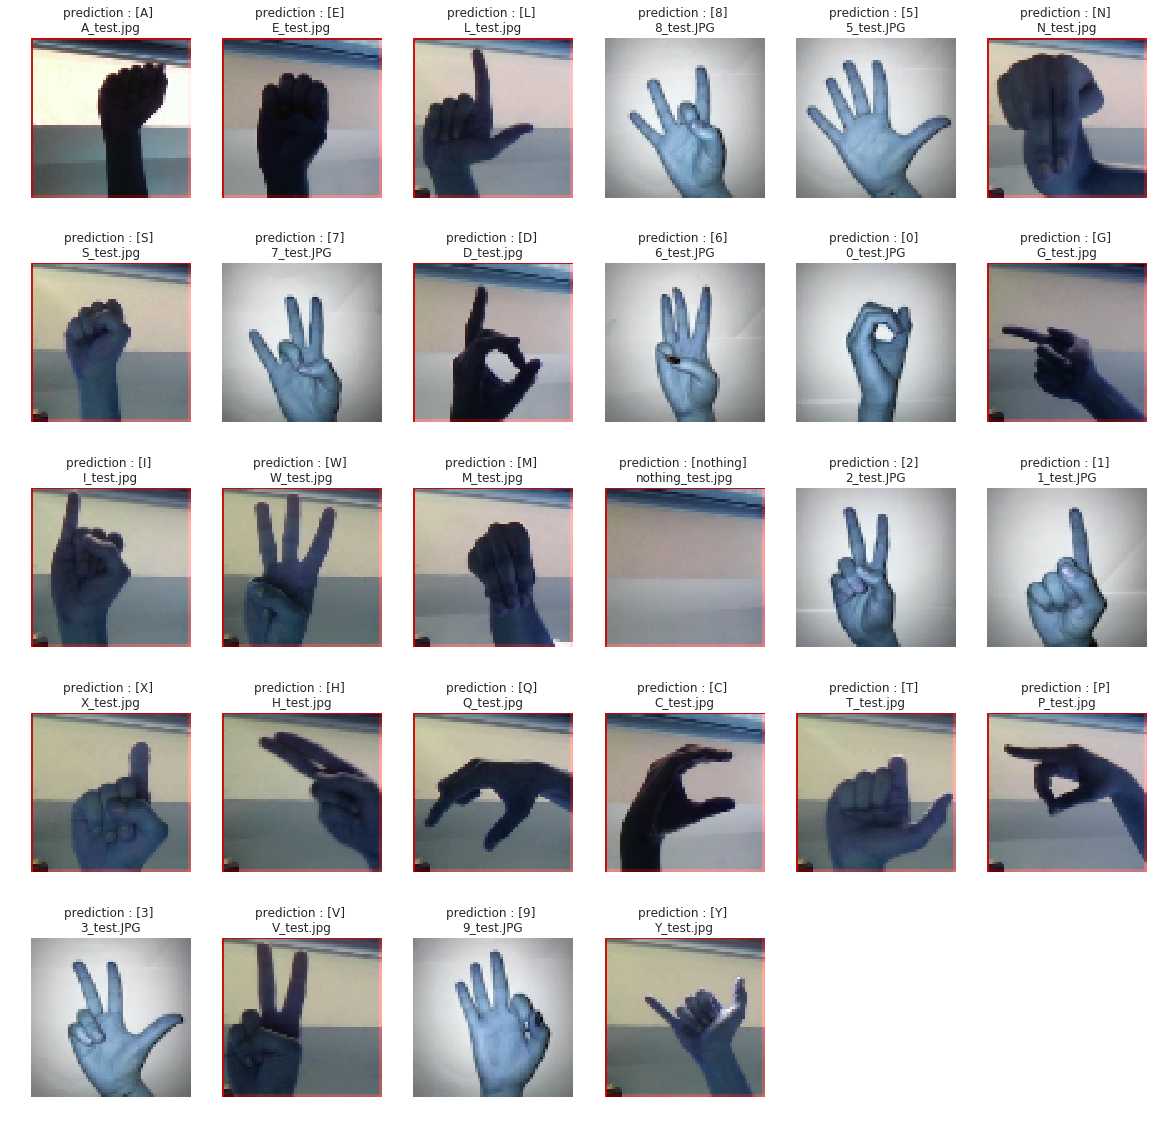

In [52]:
predfigure = plt.figure(figsize = (20,20))
def plot_image_1(fig, image, label, prediction, predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    title = "prediction : [" + str(predictions_label) + "] "+ "\n" + label
    plt.title(title)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col-1)):
    plot_image_1(predfigure, test_images[image_index], test_img_names[image_index], predictions[image_index], predictions_labels_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [53]:
# Evaluate Hybrid Model
y_pred4 = model.predict(X_test)
accuracy4 = accuracy_score(Y_test.argmax(axis=1), y_pred4.argmax(axis=1))
precision4 = precision_score(Y_test.argmax(axis=1), y_pred4.argmax(axis=1), average='weighted')
recall4 = recall_score(Y_test.argmax(axis=1), y_pred4.argmax(axis=1), average='weighted')
f1_score4 = f1_score(Y_test.argmax(axis=1), y_pred4.argmax(axis=1), average='weighted')

In [54]:
# Create DataFrame
results = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Hybrid-Model'],
    'Accuracy': [accuracy1, accuracy2, accuracy3, accuracy4],
    'Precision': [precision1, precision2, precision3, precision4],
    'Recall': [recall1, recall2, recall3, recall4],
    'F1-score': [f1_score1, f1_score2, f1_score3, f1_score4]
})

# Display DataFrame
print(results)

          Model  Accuracy  Precision    Recall  F1-score
0       Model 1  0.893224   0.903783  0.893224  0.893296
1       Model 2  0.780497   0.807671  0.780497  0.782899
2       Model 3  0.946780   0.949038  0.946780  0.946610
3  Hybrid-Model  0.997305   0.997412  0.997305  0.997304


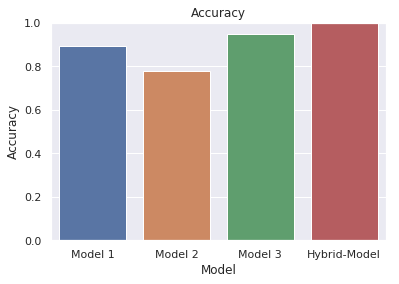

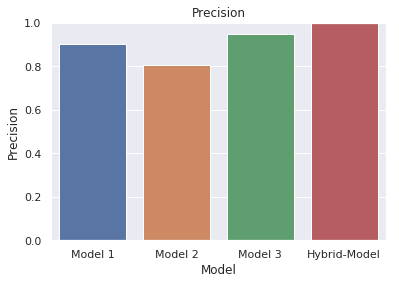

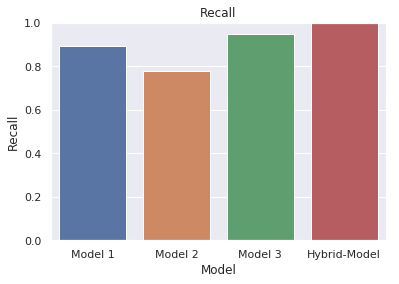

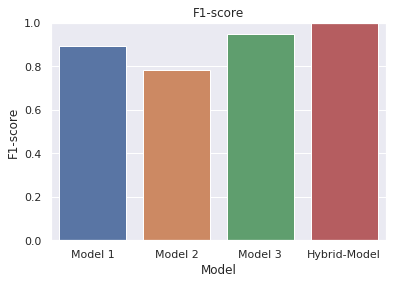

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create bar plot of accuracy scores
sns.barplot(x='Model', y='Accuracy', data=results)
plt.ylim(0, 1)
plt.title('Accuracy')
plt.show()

# Create bar plot of precision scores
sns.barplot(x='Model', y='Precision', data=results)
plt.ylim(0, 1)
plt.title('Precision')
plt.show()

# Create bar plot of recall scores
sns.barplot(x='Model', y='Recall', data=results)
plt.ylim(0, 1)
plt.title('Recall')
plt.show()

# Create bar plot of F1-scores
sns.barplot(x='Model', y='F1-score', data=results)
plt.ylim(0, 1)
plt.title('F1-score')
plt.show()

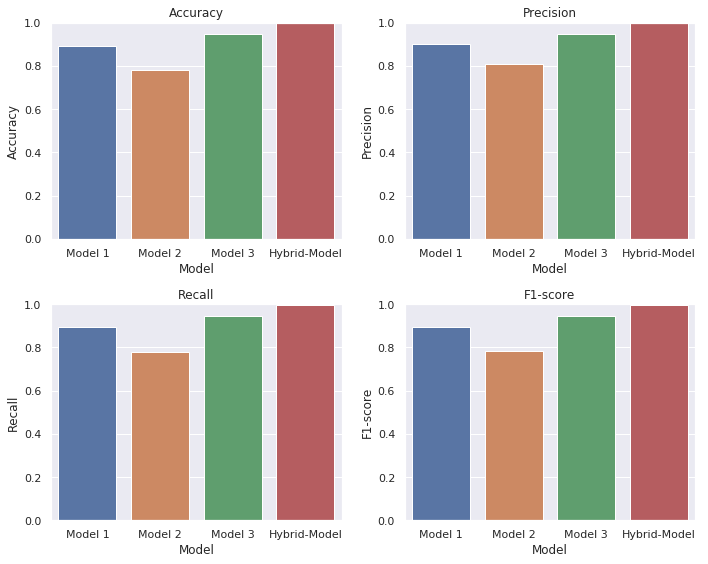

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create bar plot of accuracy scores
fig, axes = plt.subplots(2, 2, figsize=(10, 8)) # create a 2x2 grid of subplots

sns.barplot(x='Model', y='Accuracy', data=results, ax=axes[0,0])
axes[0,0].set_ylim(0, 1)
axes[0,0].set_title('Accuracy')

sns.barplot(x='Model', y='Precision', data=results, ax=axes[0,1])
axes[0,1].set_ylim(0, 1)
axes[0,1].set_title('Precision')

sns.barplot(x='Model', y='Recall', data=results, ax=axes[1,0])
axes[1,0].set_ylim(0, 1)
axes[1,0].set_title('Recall')

sns.barplot(x='Model', y='F1-score', data=results, ax=axes[1,1])
axes[1,1].set_ylim(0, 1)
axes[1,1].set_title('F1-score')

plt.tight_layout() # adjust subplot spacing
plt.show()